In [64]:
import pandas as pd
from pandas import DataFrame
import sqlite3
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [47]:
kickstarter = pd.read_csv('data/ks-projects-201801.csv')
pd.options.display.float_format = '{:,.2f}'.format

In [48]:
"""importing our cleaning function from week 4 so
that we dont have to rewrite it again. We already
did the work so why do it again? 
"""
from our_functions import clean_ks

In [49]:
kickstarter = clean_ks(kickstarter)
kickstarter.head(2)

,Name,Category,Main_Category,Currency,Goal,Pledged,State,Backers,Country,Usd Pledged,Usd_Pledged_Real,Usd_Goal_Real
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,"1,000.00",0.00,failed,0,GB,0.00,0.00,"1,533.95"
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,"30,000.00","2,421.00",failed,15,US,100.00,"2,421.00","30,000.00"


add extension Name: SQLite Viewer
sqlite-viewer
Publisher: Florian Klampfer
![SQLite](images/sqlite.png)


### Building a database and connection
- Connects to the 'kickstarter.db' database (creates it if it doesn't exist)
- Saves the 'kickstarter' DataFrame as a table. 
- Replaces the table if it already exists.


In [50]:
conn = sqlite3.connect('kickstarter.db')
kickstarter.to_sql("kickstarter", conn, if_exists="replace", index=False)

374860

This function allows us to write our queries as a string then call them

In [51]:
def query(query: str):
    return pd.read_sql(query, conn)

Example usage of our function in action

In [52]:
select_all = """SELECT * FROM kickstarter"""

query(select_all).head()


,Name,Category,Main_Category,Currency,Goal,Pledged,State,Backers,Country,Usd Pledged,Usd_Pledged_Real,Usd_Goal_Real
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,"1,000.00",0.00,failed,0,GB,0.00,0.00,"1,533.95"
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,"30,000.00","2,421.00",failed,15,US,100.00,"2,421.00","30,000.00"
2,Where is Hank?,Narrative Film,Film & Video,USD,"45,000.00",220.00,failed,3,US,220.00,220.00,"45,000.00"
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,"5,000.00",1.00,failed,1,US,1.00,1.00,"5,000.00"
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,"19,500.00","1,283.00",canceled,14,US,"1,283.00","1,283.00","19,500.00"


When we need to do a complex query you can format your query like this to make it more readable:

```python
query = """
SELECT 
    Name, 
    Goal, 
    Pledged, 
    State
FROM 
    kickstarter
WHERE 
    State = 'successful'
ORDER BY 
    Pledged DESC
LIMIT 5;
"""
```

1. What is the total number of Kickstarter campaigns in the dataset?


In [53]:
number_of_campaigns = """

"""
query(number_of_campaigns)

,COUNT(*)
0,374860


2. What is the average goal for all campaigns?


In [ ]:
average_goal = """

"""
query(average_goal)

,AVG(goal)
0,"49,522.99"


3. How many campaigns were successful, failed, or canceled?


In [ ]:
campain_success = """

"""
query(campain_success)

,COUNT(*)
0,133851


4. What is the total amount pledged (using the pledged col) across all campaigns?



In [ ]:
total_pledged = """

"""
query(total_pledged)

,total_pledged
0,"3,655,086,787.45"


5. What is the average number of backers per campaign?


In [ ]:
average_backers = """

"""
query(average_backers)

,average_backers
0,106.69


6. How many campaigns were launched in each main category?


In [ ]:
campaign_launched = """

"""
query(campaign_launched)

,'Main Category',campaign_count
0,Main Category,374860


7. Which campaign had the highest goal?


In [ ]:
high_goal = """

"""
query(high_goal)

,Name,Goal
0,"Help me start a fair media company, Trump Media","100,000,000.00"


8. What is the total pledged amount for each currency?


In [60]:
total_pledged_by_currency = """

"""
query(total_pledged_by_currency)

,Currency,total_pledged
0,AUD,"59,346,370.66"
1,CAD,"113,354,970.52"
2,CHF,"12,856,015.55"
3,DKK,"50,308,958.01"
4,EUR,"135,077,707.60"
5,GBP,"161,481,632.95"
6,HKD,"78,185,790.40"
7,JPY,"13,083,176.00"
8,MXN,"46,588,259.92"
9,NOK,"22,140,408.98"


9. Which country launched the most campaigns?



In [ ]:
campaigns_by_country = """

"""
query(campaigns_by_country)

,Country,campaign_count
0,US,292624


10. What is the success rate of campaigns in each category?

In [ ]:
sucess_rate = """

"""
query(sucess_rate)

,Category,success_rate
0,3D Printing,0.35
1,Academic,0.21
2,Accessories,0.34
3,Action,0.14
4,Animals,0.25
...,...,...
154,Woodworking,0.25
155,Workshops,0.30
156,World Music,0.44
157,Young Adult,0.21


when done always run `conn.close()`,  otherwise the database remains open in your computers memory 

In [63]:
# conn.close()

We can do everything we did with our regular pandas code with the sql queries. Including plotting! 

- This is replicating the plot from week 4s notebook.
- The first plot is using the SQL skills from above 
- The second is the same plot just using pandas. 

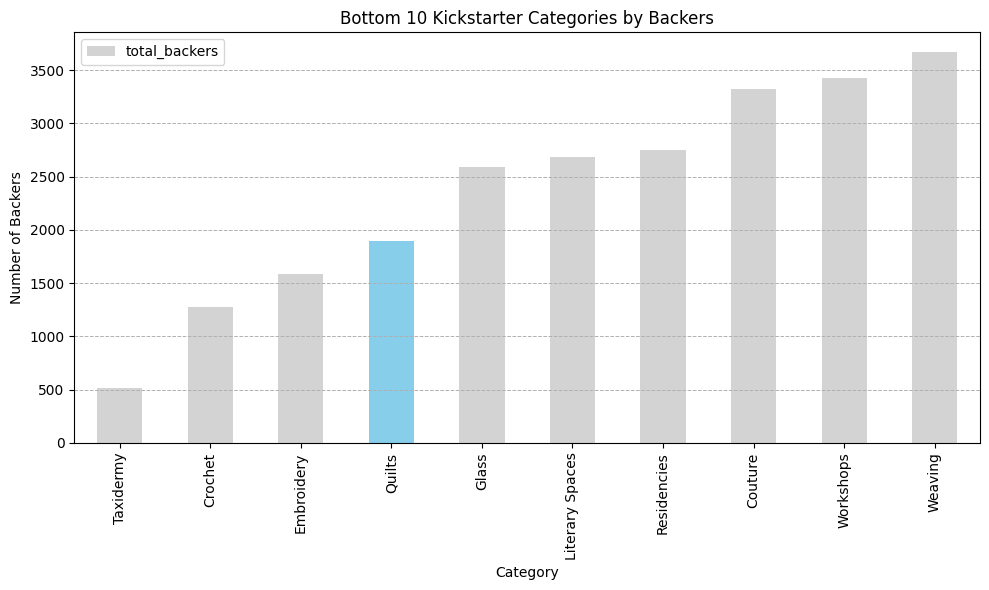

In [65]:
# sql version
#---------------------------------------------
# Define the query to get the bottom 10 categories by backers
bottom_10 = """
SELECT Category, SUM(Backers) AS total_backers
FROM kickstarter
GROUP BY Category
ORDER BY total_backers ASC
LIMIT 10;
"""

# Execute the query
cat_tail = query(bottom_10)

#---------------------------------------------

# Categories and colors for plotting
categories = cat_tail['Category']
colors = ['lightgrey' if category != 'Quilts' else 'skyblue' for category in categories]

# Setting up the bar plot
cat_tail.plot(kind='bar', x='Category', y='total_backers', rot=90, color=colors, figsize=(10, 6))

# Add title and labels
plt.title('Bottom 10 Kickstarter Categories by Backers')
plt.xlabel('Category')
plt.ylabel('Number of Backers')

# Add gridlines for fun
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)

# Show the plot
plt.tight_layout()

# optional to save the plot
# plt.savefig('quilting.jpg') 
 
plt.show()

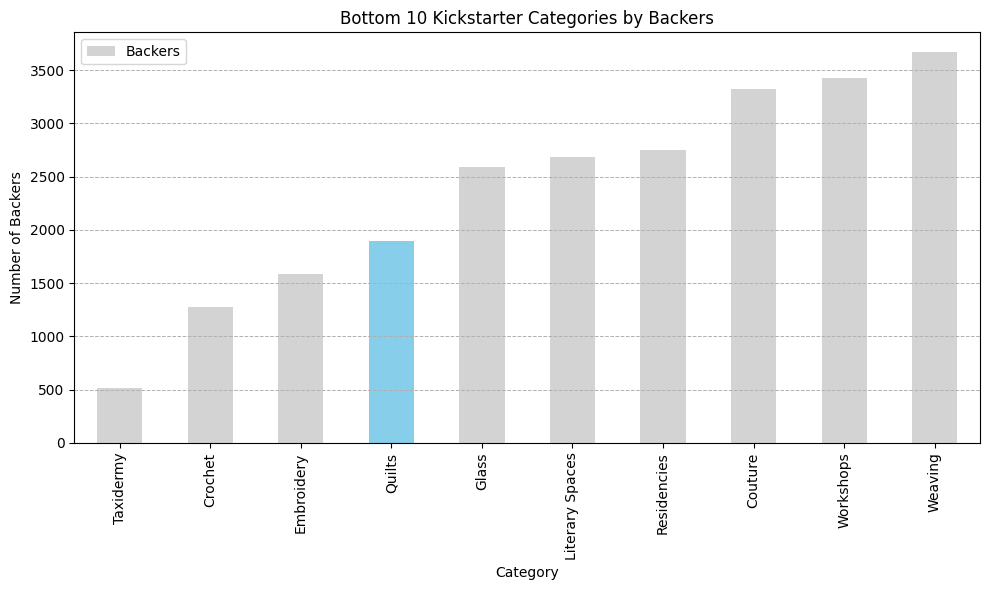

In [72]:
# pandas version
#---------------------------------------------
# Group by Category and sum the backers
category_backers = kickstarter.groupby('Category')['Backers'].sum().reset_index()

# Sort the values by 'Backers'
category_backers = category_backers.sort_values(by='Backers', ascending=True)

# Get the bottom 10 categories
cat_tail = category_backers.head(10)

#---------------------------------------------

# Categories and colors for plotting
categories = cat_tail['Category']
colors = ['lightgrey' if category != 'Quilts' else 'skyblue' for category in categories]

# Setting up the bar plot
cat_tail.plot(kind='bar', x='Category', y='Backers', rot=90, color=colors, figsize=(10, 6))

# Add title and labels
plt.title('Bottom 10 Kickstarter Categories by Backers')
plt.xlabel('Category')
plt.ylabel('Number of Backers')

# Add gridlines for fun!
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)

# Show the plot
plt.tight_layout()

# optional to save the plot
# plt.savefig('quilting.jpg')  

plt.show()